# Read dataset

In [1]:
import pandas as pd

In [2]:
customer_data = pd.read_csv('D:/DATA/Desktop/bigData/final_project/work/data/Churn_Modelling_FE.csv')

# Droping the ineffective columns
dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df_fe = dataset
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalary,...,age_balance,balance_salary,age_hascrcard,product_utilization_rate_by_year,product_utilization_rate_by_salary,countries_monthly_average_salaries,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,...,0.000000,0.000000,0.023810,0.500,0.000010,2.285103,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,...,2044.094146,0.744677,0.000000,1.000,0.000009,4.155316,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,...,3801.447619,1.401375,0.023810,0.375,0.000026,2.568803,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,...,0.000000,0.000000,0.000000,2.000,0.000021,2.115499,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,...,2918.856279,1.587055,0.023256,0.500,0.000013,2.919956,False,True,True,False


# Separate features and label and scaling data

In [3]:
from sklearn.preprocessing import StandardScaler

# Data inputs
X = df_fe.drop(['Exited'], axis = 1)
m = X

# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.columns = m.columns

# Data outputs
Y = df_fe['Exited']

# Devide train and test and scaling dataset

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7654, 32) (1914, 32) (7654,) (1914,)


# Balancing the samples

In [5]:
from collections import Counter
from imblearn.over_sampling import SMOTEN

sm = SMOTEN()
X_smot_train, Y_smot_train = sm.fit_resample(X_train, y_train)
X_smot_test, Y_smot_test = sm.fit_resample(X_test, y_test)

print('Original dataset shape(Train): ', Counter(y_train))
print('Resampled dataset shape(Train): ', Counter(Y_smot_train))
print('\nOriginal dataset shape(Test): ', Counter(y_test))
print('Resampled dataset shape(Test): ', Counter(Y_smot_test))

Original dataset shape(Train):  Counter({0: 6106, 1: 1548})
Resampled dataset shape(Train):  Counter({0: 6106, 1: 6106})

Original dataset shape(Test):  Counter({0: 1571, 1: 343})
Resampled dataset shape(Test):  Counter({1: 1571, 0: 1571})


# Logistic regression

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0     0.8695    0.9243    0.8960      1571
           1     0.9192    0.8612    0.8893      1571

    accuracy                         0.8927      3142
   macro avg     0.8943    0.8927    0.8926      3142
weighted avg     0.8943    0.8927    0.8926      3142

Accuracy: 0.8927
Precision: 0.8943
Recall: 0.8927
F1-score: 0.8926


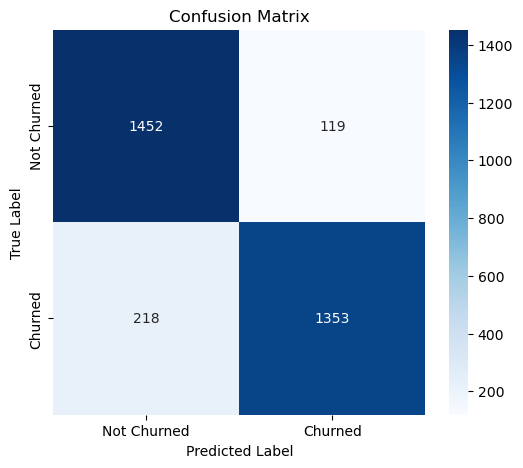

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import joblib

# Scoring functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Initialization of the LR
lr_model = LogisticRegression()

# Fit the model
lr_model = lr_model.fit(X_smot_train, Y_smot_train)

# make prediction
y_pred = lr_model.predict(X_smot_test)

# save the model
joblib.dump(lr_model, 'D:/DATA/Desktop/bigData/final_project/work/models/logic_regression/lr_model.pkl')

# calculate the evaluation metrics
accuracy = accuracy_score(Y_smot_test, y_pred)
precision = precision_score(Y_smot_test, y_pred, average='macro')  
recall = recall_score(Y_smot_test, y_pred, average='macro')
f1 = f1_score(Y_smot_test, y_pred, average='macro')  

# print the evaluation metrics
print("Classification Report:\n", classification_report(Y_smot_test, y_pred, digits=4))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(Y_smot_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

